In [1]:
#Logistic Regression to Predict Market Direction

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop

2024-05-06 15:24:23.357591: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
ticker = 'STLAM.MI'
stock = yf.Ticker(ticker)
hist_data = stock.history(period='10y')

In [4]:
STLN=pd.DataFrame(hist_data['Close'])
STLN

,Close
Date,
2014-05-06 00:00:00+02:00,3.056782
2014-05-07 00:00:00+02:00,2.699495
2014-05-08 00:00:00+02:00,2.685060
2014-05-09 00:00:00+02:00,2.717540
2014-05-12 00:00:00+02:00,2.694082
...,...
2024-04-29 00:00:00+02:00,23.225000
2024-04-30 00:00:00+02:00,20.879999
2024-05-02 00:00:00+02:00,19.980000


In [5]:
STLN.rename(columns={'Close':'Price'}, inplace=True)

In [6]:
STLN['return']=np.log(STLN['Price'] / STLN['Price'].shift(1))
lags=7
STLN

,Price,return
Date,,
2014-05-06 00:00:00+02:00,3.056782,NaN
2014-05-07 00:00:00+02:00,2.699495,-0.124298
2014-05-08 00:00:00+02:00,2.685060,-0.005362
2014-05-09 00:00:00+02:00,2.717540,0.012024
2014-05-12 00:00:00+02:00,2.694082,-0.008669
...,...,...
2024-04-29 00:00:00+02:00,23.225000,0.007780
2024-04-30 00:00:00+02:00,20.879999,-0.106438
2024-05-02 00:00:00+02:00,19.980000,-0.044060


In [7]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    STLN[col] = STLN['return'].shift(lag)
    cols.append(col)

In [8]:
STLN.dropna(inplace=True)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from sklearn import linear_model

In [11]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                              multi_class='auto',
                                              max_iter=1000)

In [12]:
lm.fit(STLN[cols], np.sign(STLN['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [13]:
#the values of prediction

In [14]:
STLN['prediction'] = lm.predict(STLN[cols])
STLN

,Price,return,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,prediction
Date,,,,,,,,,,
2014-05-16 00:00:00+02:00,2.580400,0.002801,-0.037169,0.020478,-0.029224,-0.008669,0.012024,-0.005362,-0.124298,-1.0
2014-05-19 00:00:00+02:00,2.614685,0.013199,0.002801,-0.037169,0.020478,-0.029224,-0.008669,0.012024,-0.005362,1.0
2014-05-20 00:00:00+02:00,2.659797,0.017106,0.013199,0.002801,-0.037169,0.020478,-0.029224,-0.008669,0.012024,1.0
2014-05-21 00:00:00+02:00,2.670624,0.004062,0.017106,0.013199,0.002801,-0.037169,0.020478,-0.029224,-0.008669,1.0
2014-05-22 00:00:00+02:00,2.629121,-0.015662,0.004062,0.017106,0.013199,0.002801,-0.037169,0.020478,-0.029224,-1.0
...,...,...,...,...,...,...,...,...,...,...
2024-04-29 00:00:00+02:00,23.225000,0.007780,0.006749,-0.016680,-0.001288,0.007321,0.019863,-0.004940,0.003291,1.0
2024-04-30 00:00:00+02:00,20.879999,-0.106438,0.007780,0.006749,-0.016680,-0.001288,0.007321,0.019863,-0.004940,1.0
2024-05-02 00:00:00+02:00,19.980000,-0.044060,-0.106438,0.007780,0.006749,-0.016680,-0.001288,0.007321,0.019863,1.0


In [15]:
#number of the resulting long and short positions

In [16]:
STLN['prediction'].value_counts()

 1.0    2224
-1.0     312
Name: prediction, dtype: int64

In [17]:
#the number of correct and wrong predictions

In [18]:
hits = np.sign(STLN['return'].iloc[lags:]*STLN['prediction'].iloc[lags:]
              ).value_counts()
hits

 1.0    1328
-1.0    1183
 0.0      18
dtype: int64

In [19]:
#accuracy of prediction

In [20]:
accuracy_score(STLN['prediction'],np.sign(STLN['return']))

0.5260252365930599

In [21]:
STLN['strategy'] = STLN['prediction'] * STLN['return']

In [22]:
#The gross performance of the strategy

In [23]:
STLN[['return', 'strategy']].sum().apply(np.exp)

return       7.857974
strategy    21.532874
dtype: float64

<AxesSubplot:xlabel='Date'>

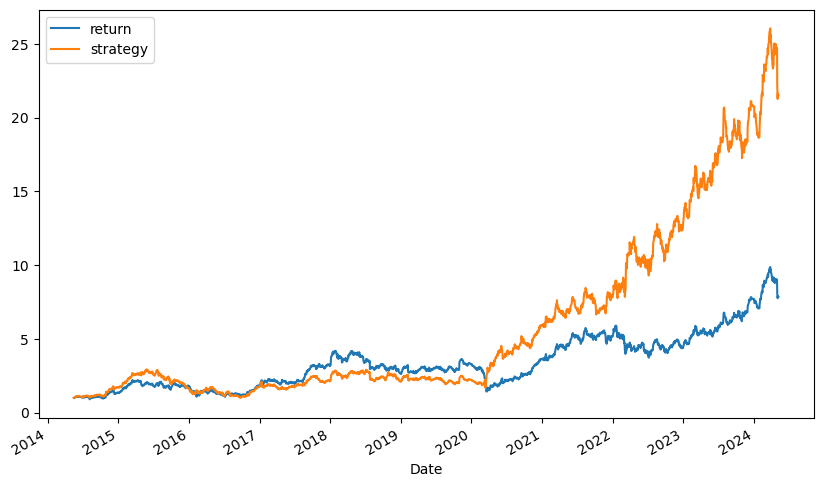

In [24]:
STLN[['return', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [25]:
mean_logrets=np.exp(STLN[['return', 'strategy']].mean() * 252) - 1
mean_logrets

return      0.227344
strategy    0.356654
dtype: float64

In [26]:
std_logrets=(STLN[['return', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5
std_logrets

return      0.379854
strategy    0.381632
dtype: float64

In [27]:
STLN['cumret'] = STLN['strategy'].cumsum().apply(np.exp)
STLN['cummax'] = STLN['cumret'].cummax()

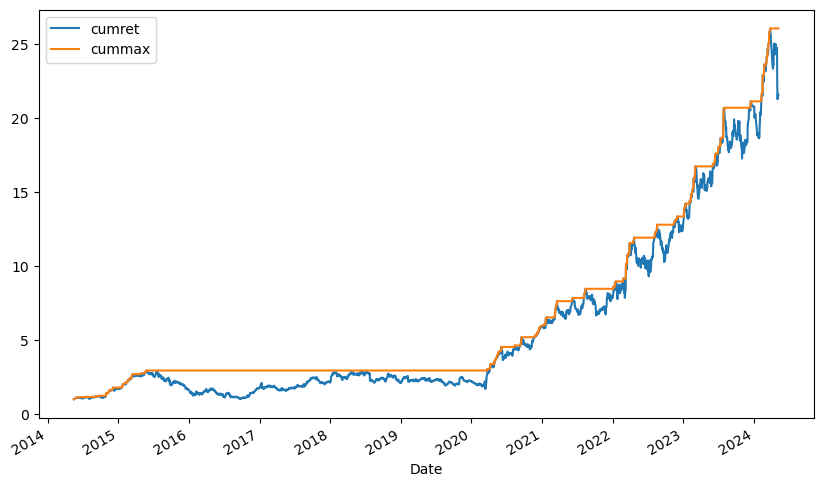

In [28]:
STLN[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));